5. Logistic Regression (Student Admission Prediction)
Suppose you are a data scientist working for a university’s admission
department. The university wants to automate the admission decision-
making process. You are given a dataset from Kaggle which includes the
following details of students:
 Entrance Exam Score (out of 100)
 Undergraduate GPA (out of 10)
 Work Experience (Yes/No)
 Admission Status (1 = Admitted, 0 = Not Admitted)
Your task is to develop a Logistic Regression model that predicts whether
a student will get admission.
Instructions:
1. Load the dataset from Kaggle and preprocess it (handle missing
values, encode work experience, scale features).
2. Train a Logistic Regression model to classify students into
Admitted or Not Admitted.
3. Write the final logistic regression equation with coefficients.
4. Evaluate the model using Accuracy, Precision, Recall, F1-score, and
Confusion Matrix.
5. Plot the ROC curve and calculate the AUC score.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


In [3]:
# Synthetic dataset creation
data = {
    'Exam_Score': [78, 85, 62, 90, 74, 88, 55, 95, 45, 82, 60, 70, 92, 65, 80],
    'GPA': [8.5, 9.0, 7.0, 9.5, 8.0, 8.9, 6.0, 9.8, 5.5, 8.6, 6.8, 7.5, 9.3, 7.2, 8.1],
    'Work_Experience': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes'],
    'Admission_Status': [1,1,0,1,0,1,0,1,0,1,0,0,1,0,1]
}

df = pd.DataFrame(data)
print("Dataset:\n", df.head())


Dataset:
    Exam_Score  GPA Work_Experience  Admission_Status
0          78  8.5             Yes                 1
1          85  9.0             Yes                 1
2          62  7.0              No                 0
3          90  9.5             Yes                 1
4          74  8.0              No                 0


In [4]:
# 3 a 
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Exam_Score          0
GPA                 0
Work_Experience     0
Admission_Status    0
dtype: int64


In [5]:
# 3 b
le = LabelEncoder()
df['Work_Experience'] = le.fit_transform(df['Work_Experience'])
print("\nAfter Encoding Work Experience:\n", df.head())



After Encoding Work Experience:
    Exam_Score  GPA  Work_Experience  Admission_Status
0          78  8.5                1                 1
1          85  9.0                1                 1
2          62  7.0                0                 0
3          90  9.5                1                 1
4          74  8.0                0                 0


In [6]:
# 3 c
X = df[['Exam_Score', 'GPA', 'Work_Experience']]
y = df['Admission_Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled Features:\n", X_scaled[:5])



Scaled Features:
 [[ 0.22778628  0.41826814  0.93541435]
 [ 0.71589973  0.82044905  0.93541435]
 [-0.88790162 -0.78827458 -1.06904497]
 [ 1.0645522   1.22262996  0.93541435]
 [-0.0511357   0.01608724 -1.06904497]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
print("Intercept (b₀):", model.intercept_[0])
print("Coefficients (b₁, b₂, b₃):", model.coef_[0])

feature_names = ['Exam_Score', 'GPA', 'Work_Experience']
for f, c in zip(feature_names, model.coef_[0]):
    print(f"{f}: {c:.4f}")


Intercept (b₀): 0.037710498849304754
Coefficients (b₁, b₂, b₃): [0.75515877 0.67007543 1.11595184]
Exam_Score: 0.7552
GPA: 0.6701
Work_Experience: 1.1160


In [10]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



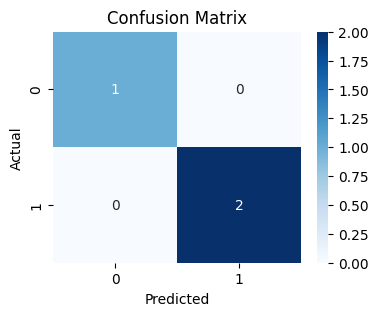

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


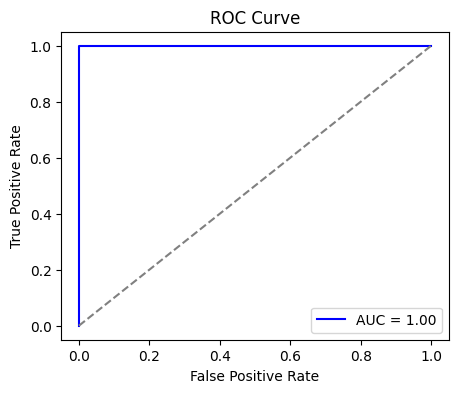

AUC Score: 1.0


In [12]:
# Probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", auc)


Logistic Regression predicts binary outcomes (Admitted / Not Admitted).

The coefficients show how much each feature affects the probability of admission.

Positive → increases chance

Negative → decreases chance

Metrics Meaning:

Accuracy → overall correctness

Precision → how many predicted “admitted” were correct

Recall → how many actual admitted were correctly identified

F1-score → balance between precision & recall

AUC → model’s ability to distinguish between admitted vs. not admitted